The first 5 rows of the dataset are:
   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Categor

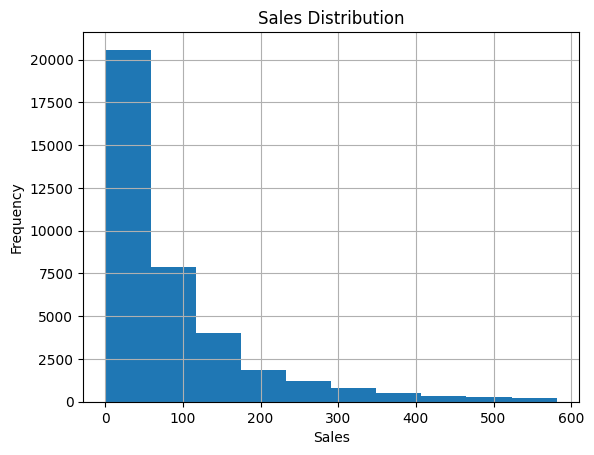

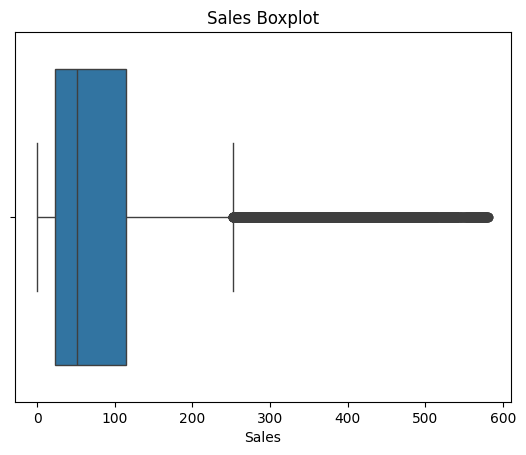

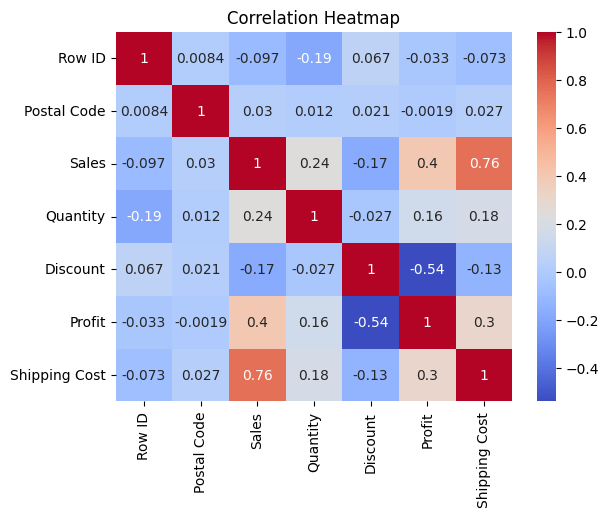

In [2]:
#Project 1: General EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\Fazal\OneDrive\Desktop\Internship\Task-2\global_superstore.csv"
df = pd.read_csv(file_path, encoding="latin1")

print("The first 5 rows of the dataset are:")
print(df.head()) #display first 5 rows

#CLEAN DATA
# Handle missing values
# For numerical columns, fill with mean
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

# For categorical columns, fill with the most frequent value
for col in df.select_dtypes(include=object).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df = df.drop_duplicates()

# Handle outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Assuming 'Sales' and 'Profit' are the columns with potential outliers
df = remove_outliers_iqr(df, 'Sales')
df = remove_outliers_iqr(df, 'Profit')

print("Data Cleaning Done")

#STATISTICAL ANALYSIS
# Measures of central tendency and dispersion
print("Mean of Sales:", df['Sales'].mean())
print("Median of Sales:", df['Sales'].median())
print("Standard Deviation of Sales:", df['Sales'].std())
print("Variance of Sales:", df['Sales'].var())

# Correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

#VISUALIZATION
# Histogram
df['Sales'].hist()
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplot
sns.boxplot(x=df['Sales'])
plt.title('Sales Boxplot')
plt.show()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The first 5 rows of the dataset are:
         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  26/11/2013   26  November  2013            19     Youth (<25)   
1  26/11/2015   26  November  2015            19     Youth (<25)   
2  23/03/2014   23     March  2014            49  Adults (35-64)   
3  23/03/2016   23     March  2016            49  Adults (35-64)   
4  15/05/2014   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Co

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Discount
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,75
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,75
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,75
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,75
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,75


Data Cleaning Done


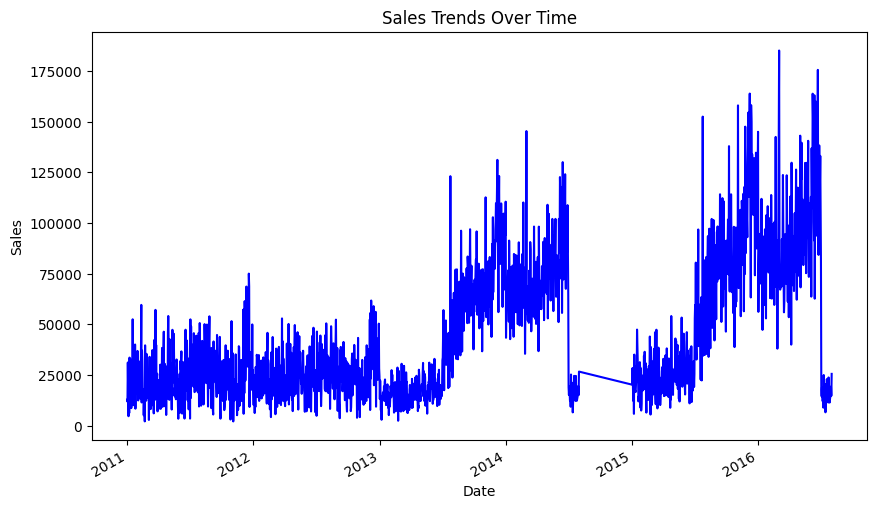

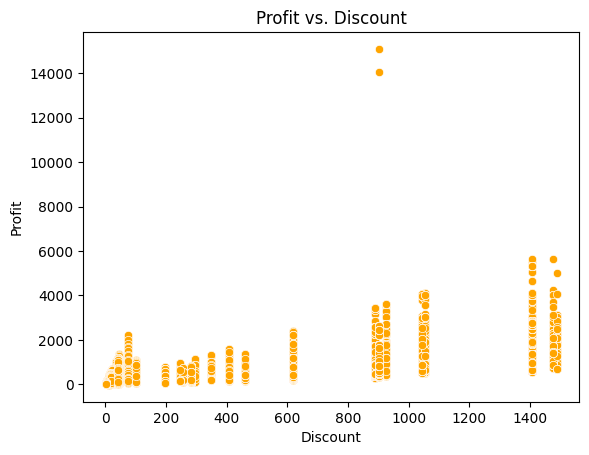

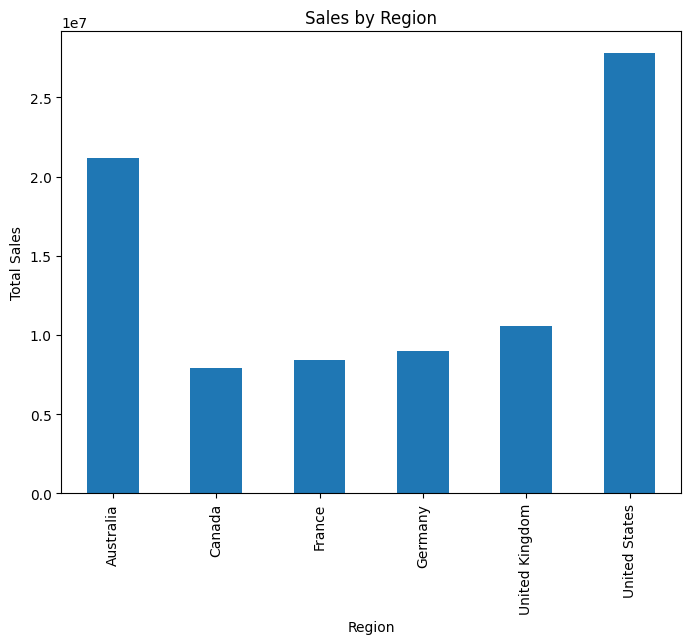

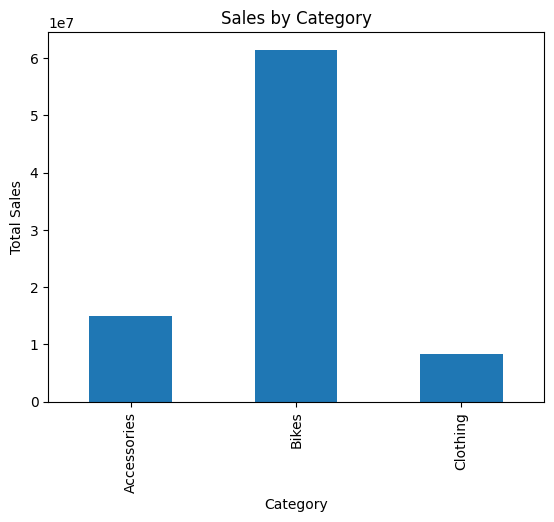

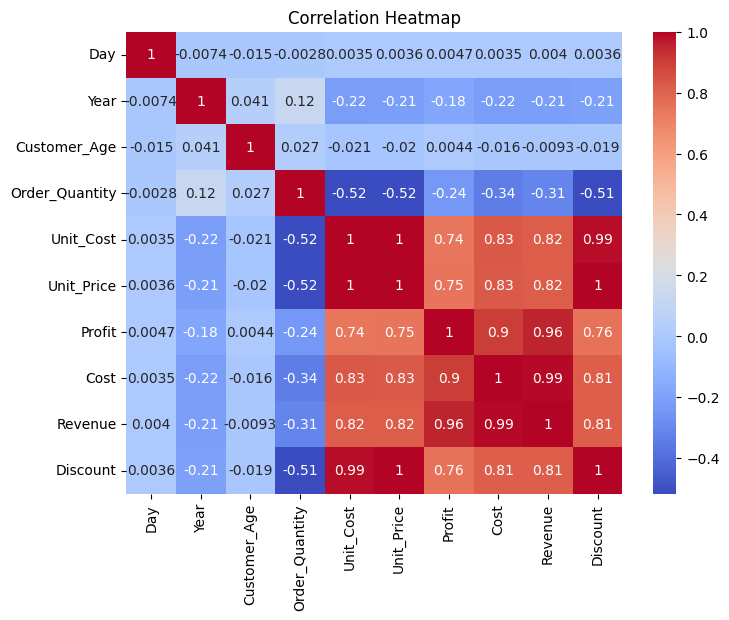

R-squared: 0.9283136107144072
Mean Squared Error: 123793.80102798897


In [5]:
#Project 2: Sales Performance Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Fazal\OneDrive\Desktop\Internship\Task-2\updated_sales_data.csv"
df_sales = pd.read_csv(file_path, encoding="latin1")
print("The first 5 rows of the dataset are:")
print(df_sales.head()) #display first 5 rows

# Explore the dataset
print("Shape of the dataset:", df_sales.shape)
print("\nMissing values:\n", df_sales.isnull().sum())
print("\nData types:\n", df_sales.dtypes)
#DATA CLEANING
#Check for duplicates
duplicates = df_sales.duplicated().sum()
print(f"No. of duplicate rows: {duplicates}")
# Remove duplicates
df_sales = df_sales.drop_duplicates()

# Fill missing values (using mean for numerical columns)
df_sales.fillna(df_sales.head(), inplace = True) 

# Convert 'Date' column to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'], dayfirst=True, errors='coerce')
display(df_sales.head())
print("Data Cleaning Done")
#EXPLORATORY DATA ANALYSIS
# Time series plot for Sales over time
plt.figure(figsize=(10, 6))
df_sales.groupby('Date')['Revenue'].sum().plot(kind='line',color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Scatter plot for Profit vs. Discount
sns.scatterplot(x='Discount', y='Profit', data = df_sales, color='orange')
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Bar plot for Sales by Region
plt.figure(figsize=(8, 6))
df_sales.groupby('Country')['Revenue'].sum().plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Bar plot for Sales by Category
df_sales.groupby('Product_Category')['Revenue'].sum().plot(kind='bar')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

# Select only numeric columns
numeric_df = df_sales.select_dtypes(include=[np.number])
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
#PREDICTIVE MODELING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Prepare the data for modeling
X = df_sales[['Profit', 'Discount']]  # Features
y = df_sales['Revenue']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)